<font size=6> **实验1 机器学习入门**</font>

- 掌握Anaconda、Scikit-Learn、Seaborn库的安装；
- 掌握Jupyter Notebook的使用；
- 理解Pandas、Seaborn的基本用法，并能进行数据处理、数据分析及可视化；
- 理解利用sklearn库加载数据、训练模型、评估模型、预测、保存模型、载入模型的全过程操作。


**(实验报告提交题)** 根据提供的“iris.csv”及“Iris DataSet（鸢尾属植物数据集）.pdf”，并参考“lab_1_3 资料/练习.ipynb”，请用pandas、seaborn对该数据集及各特征进行分析 、可视化，并尝试用sklearn的SVC建立模型并训练，如有问题，请想办法解决。

    说明：实验报告可由Jupyter notebook中“打印…”保存为pdf格式得到，命名要求：实验1_学号_姓名.pdf。


# 导入库

In [ ]:
import sklearn
import seaborn as sns
import pandas as pd
from pandas import plotting
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 数据处理

## 导入数据

载入数据

In [ ]:
df_iris = pd.read_csv('iris.csv',header=None)
df_iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 数据探查

1.查看数据信息

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


2.查看数据集各特征列的摘要统计信息

In [ ]:
df_iris.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3.查看数据非空情况

In [ ]:
df_iris[4].value_counts()

4
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## 处理数据

1.载入特征和标签集

In [ ]:
df_iris.columns = ['A','B','C','D','E']

In [ ]:
X = df_iris[['A', 'B', 'C', 'D']]
y = df_iris['E']

In [ ]:
df_iris.head()

,A,B,C,D,E
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


2.对标签集进行编码

In [ ]:
from sklearn.calibration import LabelEncoder


encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


3.将数据集拆分为训练数据和测试数据

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 101)
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(105, 4) (105,) (45, 4) (45,)


## 特征分析

<Axes: xlabel='A', ylabel='B'>

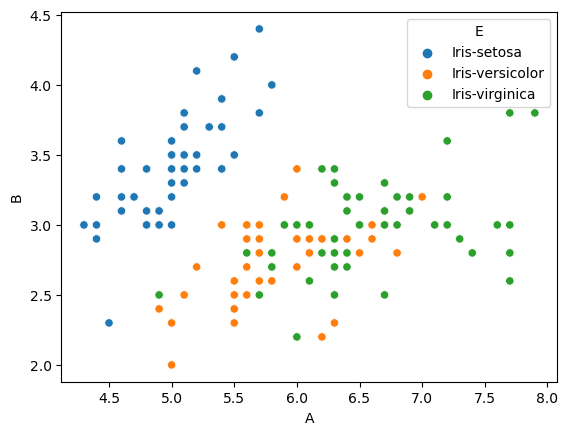

In [ ]:
sns.scatterplot(df_iris, x='A', y='B', hue='E')

d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

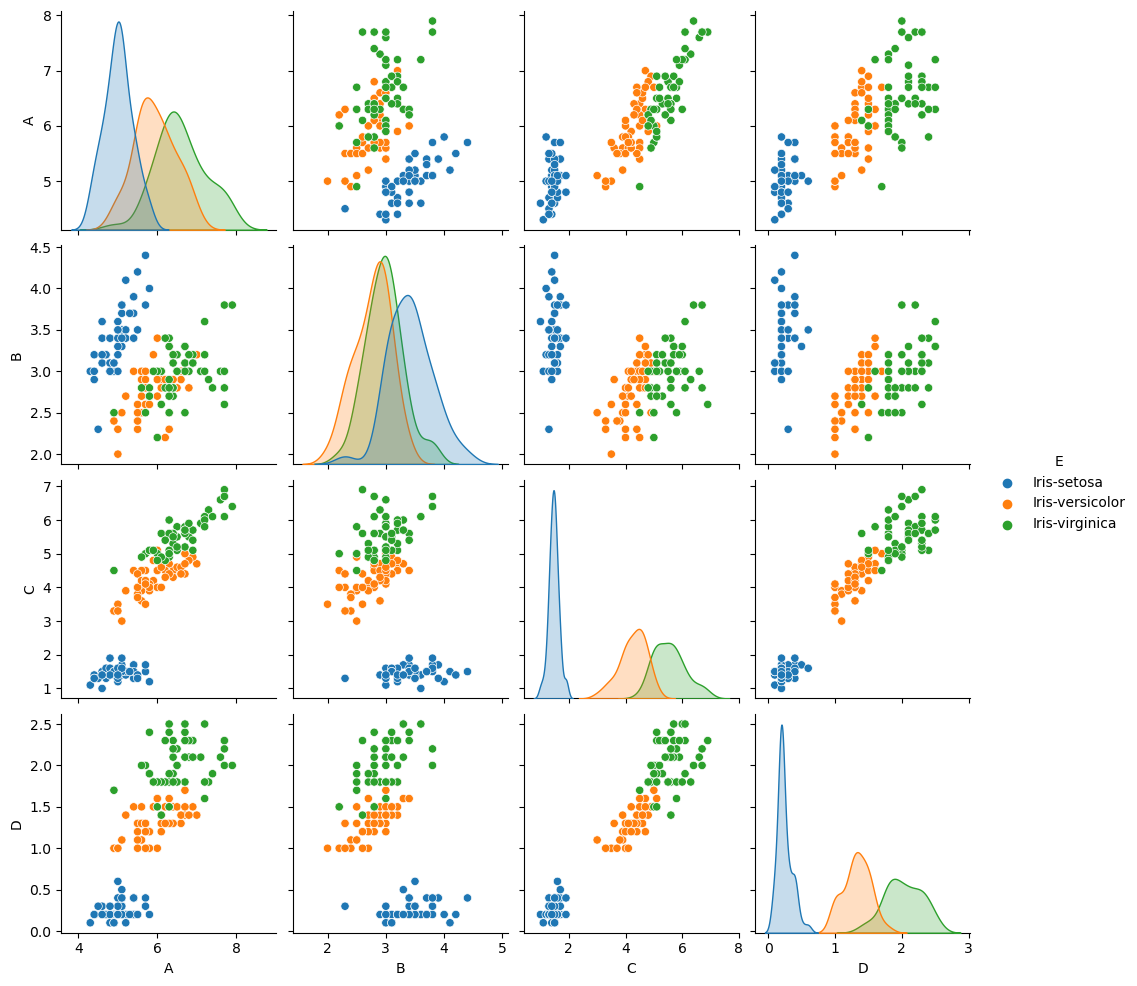

In [ ]:
sns.pairplot(df_iris, hue='E')

<Axes: xlabel='A', ylabel='E'>

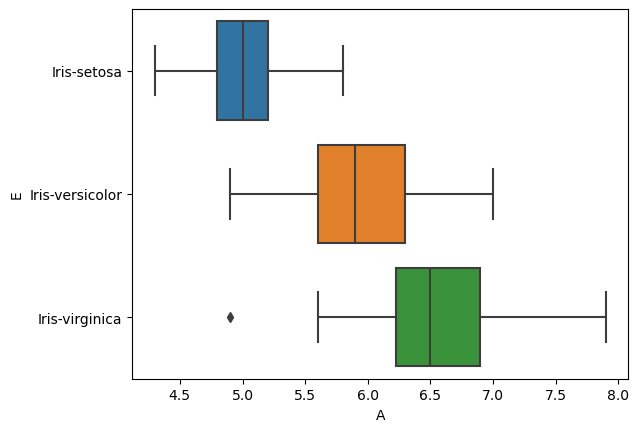

In [ ]:
sns.boxplot(df_iris, x = 'A', y = 'E')

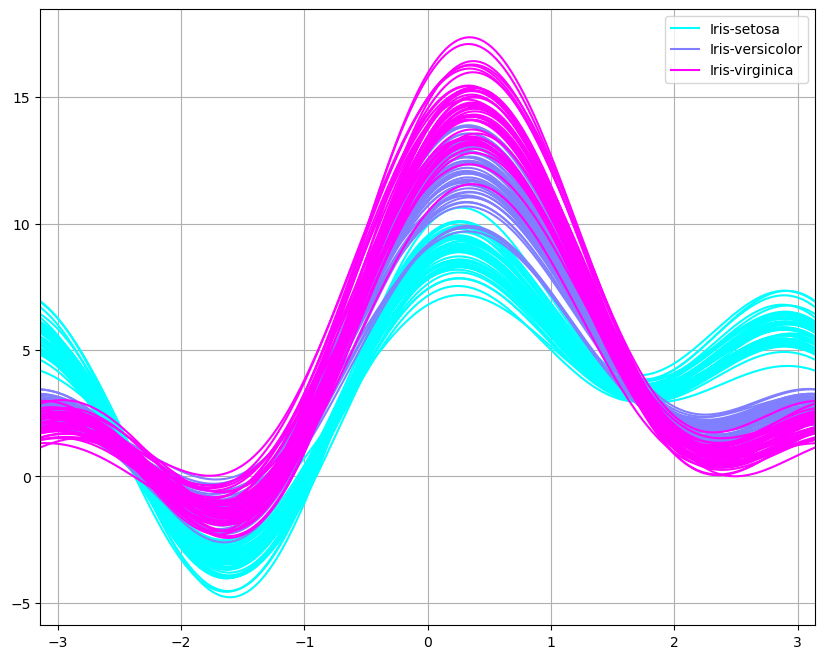

In [ ]:
plt.subplots(figsize = (10,8))
plotting.andrews_curves(df_iris, 'E', colormap='cool')
plt.show()

# 建模

#Support Vector Machine

In [ ]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the SVM is: 0.9777777777777777


#Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Logistic Regression is: 0.9777777777777777


#Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the Decision Tree is: 0.9555555555555556


#K-Nearest Neighbours

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is: {0}'.format(metrics.accuracy_score(prediction,test_y)))

The accuracy of the KNN is: 1.0


分别使用花瓣和花萼的尺寸

In [ ]:
petal = df_iris[['C', 'D', 'E']]
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)
train_x_p=train_p[['D','C']]
train_y_p=train_p.E
test_x_p=test_p[['D','C']]
test_y_p=test_p.E
sepal = df_iris[['A', 'B', 'E']]
train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)
train_x_s=train_s[['B','A']]
train_y_s=train_s.E
test_x_s=test_s[['B','A']]
test_y_s=test_s.E

In [ ]:
model=svm.SVC()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the SVM using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [ ]:
model = LogisticRegression()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [ ]:
model=DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p, train_y_p)
prediction = model.predict(test_x_p)
print('The accuracy of the KNN using Petals is: {0}'.format(metrics.accuracy_score(prediction,test_y_p)))
model.fit(train_x_s, train_y_s)
prediction = model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is: {0}'.format(metrics.accuracy_score(prediction,test_y_s)))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333
